In [1]:
from utils.analyze import load_data, detrend2D, wiener, sensor_function, sample_shape
from utils.plot import plot
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy.ndimage.filters import gaussian_filter
from skimage.restoration import wiener as de
%matplotlib inline

In [2]:
x, y, z, T, t, settings = load_data("agglomerat1", range(1,11))
x = x[0]
y = y[0]
settings = settings[0]

In [3]:
def cat1d(x):
    x_flat = [xi.flatten() for xi in x]
    return np.concatenate(x_flat)

In [4]:
#dt = np.array([[datetime.datetime.fromtimestamp(tii) for tii in ti] for ti in t])
#plt.plot(cat1d(dt), cat1d(T))

In [5]:
signal = z[0][0]

(<matplotlib.figure.Figure at 0x7f4742cdf5f8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4742ce7198>)

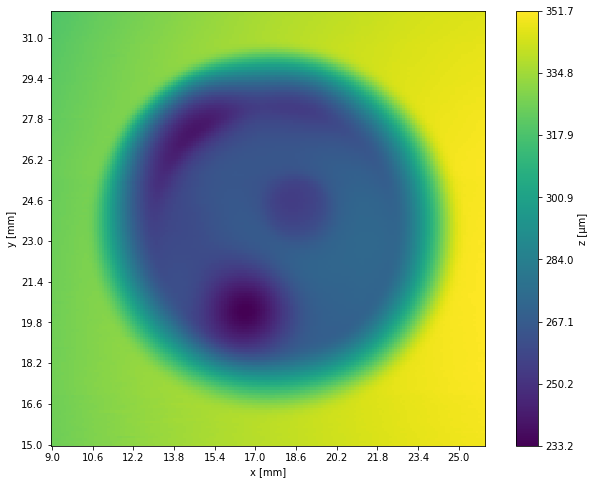

In [6]:
plot(x, y, signal)

(<matplotlib.figure.Figure at 0x7f473e3331d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f473e329550>)

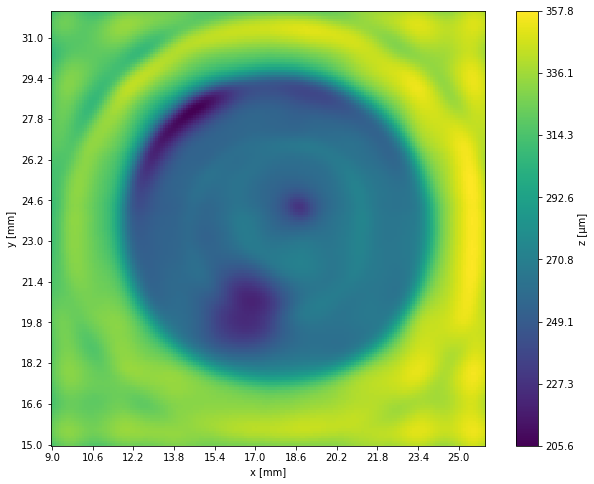

In [19]:
diameter = 2.57
sigma = 0
stepsize = settings['extent'][0][2]

kernel = sensor_function(diameter / stepsize, sigma)
z_reconstructed = wiener(signal, kernel, 0.015, extra=3)
plot(x, y, z_reconstructed)

(<matplotlib.figure.Figure at 0x7f69c5193588>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f69c5206780>)

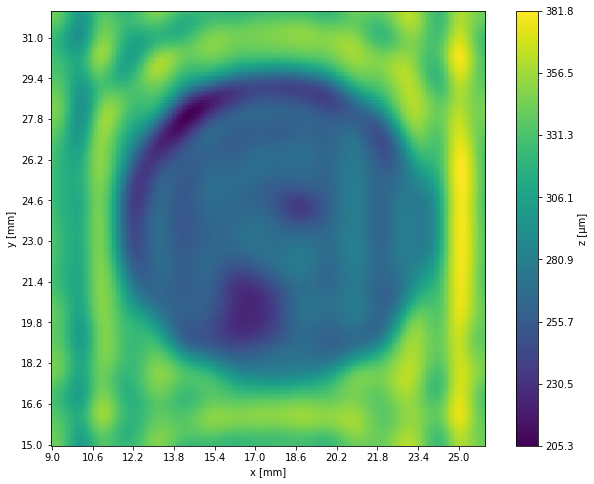

In [18]:
diameter = 2.57
sigma = 0.5
stepsize = settings['extent'][0][2]

kernel = sensor_function(diameter / stepsize, sigma)
z_reconstructed = de(signal, kernel, 1, clip=False)
plot(x, y, z_reconstructed)